# Class 5/30/24 Notes #

# Some Ensemble Methods #

+ Bagging
+ Boosting
+ Stacking

And a special Case:

+ Random Forests 

## Bootstrapping Review ##

Bagging is short for 'Bootstrap aggregating'.

**Bootstrapping** in statistics is the process of resampling from *the same data* (with replacement) to improve on an estimate of a parameter. 

For example:  Suppose you have a sample of size 40 taken from a normal distribution with an unknown mean.  How can you find a confidence interval for the mean?

1. **Theoretical approach:** Use the Central Limit Theorem to produce a confidence interval.

2. **Bootstrapping approach:** *Resample* from the original sample to produce a distribution of sample values and then find the quantiles.

### Another Synthetic Dataset Example: ###

In [16]:
mydata = np.random.normal(loc=15, scale=10, size=40)

13.259906311181174
9.305581294884567


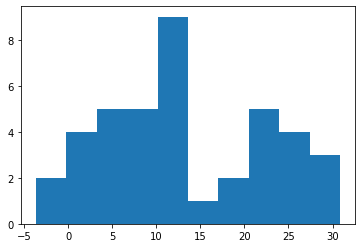

In [17]:
plt.hist(mydata)
print(np.mean(mydata))
print(np.std(mydata))

**Theoretical Approach:** By the CLT, a 95% CI for the population mean is:

In [18]:
[np.mean(mydata) - 1.96*np.std(mydata)/np.sqrt(40) , np.mean(mydata) + 1.96*np.std(mydata)/np.sqrt(40)]

[10.376076790499143, 16.143735831863207]

**Bootstrap Approach: Resampling the Data with Replacement**

In [19]:
mysamples = [ np.mean(np.random.choice(mydata,size=40, replace=True)) for i in np.arange(600) ]

(array([  1.,   7.,  35.,  67., 135., 147., 106.,  69.,  27.,   6.]),
 array([ 8.3068363 ,  9.231879  , 10.1569217 , 11.0819644 , 12.0070071 ,
        12.9320498 , 13.85709251, 14.78213521, 15.70717791, 16.63222061,
        17.55726331]),
 <BarContainer object of 10 artists>)

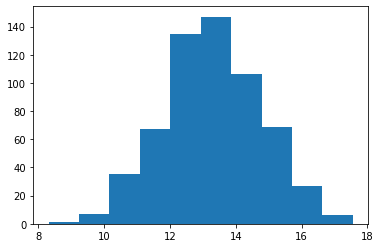

In [20]:
plt.hist(mysamples)

In [21]:
np.quantile(mysamples, [0.025, 0.975])

array([10.3677409 , 16.35146474])

# Bagging:  "Bootstrap Aggregating" #

(See [here](https://www.simplilearn.com/tutorials/machine-learning-tutorial/bagging-in-machine-learning) or [here](https://en.wikipedia.org/wiki/Bootstrap_aggregating).)

**Idea:** Create $m$ new bootstrap samples (with replacement) from the dataset.  Then use each of these to create a *new* decision tree and hold an election among the decision trees.  This will:

+ improve accuracy
+ reduce overfitting

For the example below, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).  For the BaggingClassifier syntax, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

### Example: SKLearn Breast Cancer Database ###

This is a [famous dataset](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [12]:
(X, y) = skd.load_breast_cancer(return_X_y = True )

In [23]:
train_X, test_X, train_y, test_y = train_test_split(X,y)

In [24]:
X.shape

(569, 30)

In [25]:
y.shape

(569,)

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
mymodel = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators = 20)

In [28]:
mymodel.fit(train_X, train_y)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=20)

In [29]:
confusion_matrix(mymodel.predict(test_X),test_y)

array([[50,  6],
       [ 3, 84]])

### For Comparision: A Single Decision Tree ##

In [30]:
mytree = DecisionTreeClassifier()
mytree.fit(train_X, train_y)
confusion_matrix(mytree.predict(test_X), test_y)

array([[46,  7],
       [ 7, 83]])

# Random Forests #

A **random forest** uses bootstrap aggregating **and** in addition, if there are $M$ features, then at each node, only $n < M$ attributes are randomly selected to potentially be used for the split, and the best option is chosen among only these.  So different, non-correlated trees will be generated for each bootstrap sample because the possible features at each node will be different for each tree.

Anything that can be said about Bagging can be said about Random Forests as well.

Bagging works for many different classifiers.  Random forests (as the name would suggest) only works for decision trees.  Why?

The SKLearn random forest classifier is [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

### Example ###

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
myforest = RandomForestClassifier()
myforest.fit(train_X, train_y)

RandomForestClassifier()

In [33]:
confusion_matrix(myforest.predict(test_X), test_y)

array([[50,  5],
       [ 3, 85]])

In [34]:
accuracy_score(myforest.predict(test_X), test_y)

0.9440559440559441

### Note: It's possible to see the class probabilities for your predictions ###

Where did it struggle?

In [35]:
myforest.predict_proba(test_X)

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.91, 0.09],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.08, 0.92],
       [1.  , 0.  ],
       [0.82, 0.18],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.04, 0.96],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.19, 0.81],
       [0.  , 1.  ],
       [0.94, 0.06],
       [0.01, 0.99],
       [0.06, 0.94],
       [0.04, 0.96],
       [0.48, 0.52],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.18, 0.82],
       [0.01, 0.99],
       [0.09, 0.91],
       [1.  , 0.  ],
       [0.8 , 0.2 ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.64, 0.36],
       [0.91, 0.09],
       [0.19, 0.81],
       [0.53, 0.47],
       [0.9 , 0.1 ],
       [0.05,

# Boosting: A different philosophy #

See [here](https://www.cs.toronto.edu/~mbrubake/teaching/C11/Handouts/AdaBoost.pdf) or [here](https://www.ibm.com/topics/boosting).

"Boosting is a general strategy for learning classifiers by combining simpler ones. The idea of boosting is to take a “weak classifier” — that is, any classifier that will do at least slightly better than chance — and use it to build a much better classifier, thereby boosting the performance of the weak classification algorithm. This boosting is done by averaging the outputs of a collection of weak classifiers."

There are essentially two algorithms for boosting:  [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost) and [GradientBoosting](https://en.wikipedia.org/wiki/Gradient_boosting) (along with XGBoost). In SKLearn the AdaBoost classifier is [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).

We will talk about Adaboost, since it has been around longer and is easier to explain.  The basic idea behind Adaboost is that you start with a weak regressor/classifier and then step-by-step build up stronger regressors/classifiers.

In [36]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
mybooster = AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [38]:
mybooster.fit(train_X, train_y)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [39]:
confusion_matrix(mybooster.predict(test_X),test_y)

array([[49,  6],
       [ 4, 84]])

## Regression?  ##

There are regression versions of all of these.  How would they be defined?

Use [BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html#sklearn.ensemble.BaggingRegressor) and [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor).